# Dados de ocorrências aeronáuticas da aviação civil brasileira nos últimos 10 anos.

In [1]:
import pandas as pd
import pandera as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets

In [2]:
valores_ausentes=['###!','####','','****','*****','NULL','null','87','**', '']
#eliminacao de dados nao informados
df = pd.read_csv("ocorrencia_2010_2020.csv", sep=",",  parse_dates=['ocorrencia_dia'], dayfirst=True, na_values=valores_ausentes)
#df = pd.read_csv("ocorrencia_2010_2020.csv", sep=",",  parse_dates=['ocorrencia_dia'], dayfirst=True)
#apagar colunas Unname
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
#exbir as 10 primeiras linhas
df.head(30)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,1,NÃO
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,1,NÃO
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0,1,NÃO
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,1,NÃO
5,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0,1,NÃO
6,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0,1,SIM
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3,1,NÃO
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2,1,NÃO
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0,1,NÃO


In [3]:
schema = pa.DataFrameSchema(
    columns = {
        "codigo_ocorrencia":pa.Column(pa.Int),
        "codigo_ocorrencia2":pa.Column(pa.Int),
        "ocorrencia_classificacao":pa.Column(pa.String),
        "ocorrencia_cidade":pa.Column(pa.String), 
        "ocorrencia_uf":pa.Column(pa.String, pa.Check.str_length(2,2)), 
        "ocorrencia_aerodromo":pa.Column(pa.String), 
        "ocorrencia_dia":pa.Column(pa.DateTime), 
        "ocorrencia_hora":pa.Column(pa.String, pa.Check.str_matches(r'^([0-1]?[0-9]|[2][0-3]):([0-5][0-9])(:[0-5][0-9])?$'), nullable=True), 
        "total_recomendacoes":pa.Column(pa.Int, nullable=True),                                        
    }
)

# Limpeza dos dados

In [4]:
# onde tiver os caracteres abaixo será inserido <NA>
#df.replace(['###!','####','','****','*****','NULL','null','87','**', ''], pd.NA, inplace=True)

In [5]:
df.head(30)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,1,NÃO
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,1,NÃO
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0,1,NÃO
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,1,NÃO
5,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0,1,NÃO
6,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0,1,SIM
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3,1,NÃO
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2,1,NÃO
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0,1,NÃO


In [6]:
#soma valores nao informados <NA>
df.isna().sum()

codigo_ocorrencia                0
ocorrencia_classificacao         0
ocorrencia_cidade                0
ocorrencia_uf                    0
ocorrencia_aerodromo          2346
ocorrencia_dia                   0
ocorrencia_hora                  0
total_recomendacoes              0
total_aeronaves_envolvidas       0
ocorrencia_saida_pista           0
dtype: int64

In [7]:
#localizar ocorrencias vazias em ocorrencia_aerodromo
df.loc[0,'ocorrencia_aerodromo'] == ''

False

In [8]:
df

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,1,NÃO
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,1,NÃO
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0,1,NÃO
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,1,NÃO
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0,1,NÃO
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,1,NÃO
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,NaN,2020-12-31,09:00:00,0,1,NÃO


In [9]:
filtro=df.ocorrencia_aerodromo.isnull()
df.loc[filtro]

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,NaN,2010-01-03,12:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,NaN,2010-01-04,17:30:00,0,1,NÃO
5,39807,INCIDENTE,SALVADOR,BA,NaN,2010-01-06,17:53:00,0,1,NÃO
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,NaN,2010-01-09,12:30:00,3,1,NÃO
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,NaN,2010-01-10,20:00:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...
5744,79753,INCIDENTE GRAVE,GOIATUBA,GO,NaN,2020-12-29,12:00:00,0,1,SIM
5745,79755,ACIDENTE,MATO RICO,PR,NaN,2020-12-29,10:30:00,0,1,NÃO
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,NaN,2020-12-30,18:30:00,0,1,NÃO
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,NaN,2020-12-31,09:00:00,0,1,NÃO


In [10]:
#coloca <NA> onde esta 0 na coluna total_recomendacoes
df.fillna(value={'total_recomendacoes':0}, inplace=True)

In [11]:
#onde tem <NAN> é inserido 0
df.fillna(0, inplace=True)

In [12]:
#soma valores nao informados <NA>
df.isna().sum()

codigo_ocorrencia             0
ocorrencia_classificacao      0
ocorrencia_cidade             0
ocorrencia_uf                 0
ocorrencia_aerodromo          0
ocorrencia_dia                0
ocorrencia_hora               0
total_recomendacoes           0
total_aeronaves_envolvidas    0
ocorrencia_saida_pista        0
dtype: int64

In [13]:
df.head(30)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,0,2010-01-03,12:00:00,0,1,NÃO
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,1,NÃO
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,0,2010-01-04,17:30:00,0,1,NÃO
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,1,NÃO
5,39807,INCIDENTE,SALVADOR,BA,0,2010-01-06,17:53:00,0,1,NÃO
6,40215,INCIDENTE,COARI,AM,SBUY,2010-01-07,18:40:00,0,1,SIM
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,0,2010-01-09,12:30:00,3,1,NÃO
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2,1,NÃO
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,0,2010-01-10,20:00:00,0,1,NÃO


In [14]:
#medidas estatísticas
df.describe()
#De 2010 a 2020 houveram 5752 acidentes aéreos no Brasil

,codigo_ocorrencia,total_recomendacoes,total_aeronaves_envolvidas
count,5752.000000,5752.000000,5752.000000
mean,58504.211926,0.305633,1.011648
std,14060.291611,1.153699,0.113602
min,39115.000000,0.000000,0.000000
25%,46366.500000,0.000000,1.000000
50%,52692.500000,0.000000,1.000000
75%,77653.750000,0.000000,1.000000
max,79874.000000,23.000000,3.000000


In [15]:
#apaga onde esta <NA>
df.dropna()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,INCIDENTE,RIO DE JANEIRO,RJ,0,2010-01-03,12:00:00,0,1,NÃO
1,40349,INCIDENTE,BELÉM,PA,SBBE,2010-01-03,11:05:00,0,1,NÃO
2,40351,INCIDENTE,RIO DE JANEIRO,RJ,SBRJ,2010-01-03,03:00:00,0,1,NÃO
3,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,0,2010-01-04,17:30:00,0,1,NÃO
4,40324,INCIDENTE,PELOTAS,RS,SBPK,2010-01-05,19:25:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...
5747,79804,INCIDENTE,CAMPINAS,SP,SBKP,2020-12-29,19:00:00,0,1,NÃO
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,0,2020-12-30,18:30:00,0,1,NÃO
5749,79802,INCIDENTE,RIO DE JANEIRO,RJ,SBGL,2020-12-30,00:54:00,0,1,NÃO
5750,79756,INCIDENTE GRAVE,VICENTINA,MS,0,2020-12-31,09:00:00,0,1,NÃO


In [16]:
#média de total de recomendacoes
df['total_recomendacoes'].mean()

0.3056328233657858

In [17]:
incidente_grave = df.query('ocorrencia_classificacao == "INCIDENTE GRAVE"')
incidente_grave

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
7,39707,INCIDENTE GRAVE,CANUTAMA,AM,0,2010-01-09,12:30:00,3,1,NÃO
8,39156,INCIDENTE GRAVE,CASCAVEL,PR,SBCA,2010-01-10,23:15:00,2,1,NÃO
9,39711,INCIDENTE GRAVE,PARÁ DE MINAS,MG,0,2010-01-10,20:00:00,0,1,NÃO
29,39709,INCIDENTE GRAVE,CURITIBA,PR,SBBI,2010-01-23,16:36:00,2,1,SIM
35,39487,INCIDENTE GRAVE,PALMAS,TO,SBPJ,2010-01-26,16:50:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...
5741,79754,INCIDENTE GRAVE,NOVA MARINGÁ,MT,0,2020-12-28,13:00:00,0,1,SIM
5744,79753,INCIDENTE GRAVE,GOIATUBA,GO,0,2020-12-29,12:00:00,0,1,SIM
5746,79769,INCIDENTE GRAVE,MANOEL URBANO,AC,SIMB,2020-12-29,18:30:00,0,1,SIM
5748,79757,INCIDENTE GRAVE,LAGOA DA CONFUSÃO,TO,0,2020-12-30,18:30:00,0,1,NÃO


In [18]:
incidente_grave.describe()

,codigo_ocorrencia,total_recomendacoes,total_aeronaves_envolvidas
count,737.000000,737.000000,737.000000
mean,60611.620081,0.510176,1.025780
std,14681.435168,1.485516,0.166934
min,39156.000000,0.000000,1.000000
25%,46576.000000,0.000000,1.000000
50%,53271.000000,0.000000,1.000000
75%,78171.000000,0.000000,1.000000
max,79769.000000,20.000000,3.000000


In [19]:
# filtro de cidades e total_recomendacoes e ocorrencia_classificacao c/INCIDENTE GRAVE
filtro = df.ocorrencia_classificacao =='INCIDENTE GRAVE'
df.loc[filtro,['ocorrencia_cidade', 'total_recomendacoes', 'ocorrencia_classificacao']]
# 737 ocorrênciais

,ocorrencia_cidade,total_recomendacoes,ocorrencia_classificacao
7,CANUTAMA,3,INCIDENTE GRAVE
8,CASCAVEL,2,INCIDENTE GRAVE
9,PARÁ DE MINAS,0,INCIDENTE GRAVE
29,CURITIBA,2,INCIDENTE GRAVE
35,PALMAS,0,INCIDENTE GRAVE
...,...,...,...
5741,NOVA MARINGÁ,0,INCIDENTE GRAVE
5744,GOIATUBA,0,INCIDENTE GRAVE
5746,MANOEL URBANO,0,INCIDENTE GRAVE
5748,LAGOA DA CONFUSÃO,0,INCIDENTE GRAVE


In [20]:
# filtro cuja ocorrencia_classificacao == INCIDENTE GRAVE e o ocorrencia_uf == SP
filtro1 = df.ocorrencia_classificacao == 'INCIDENTE GRAVE'
filtro2 = df.ocorrencia_uf == 'SP'
df.loc[filtro1 & filtro2]
#137 INCIDENTE GRAVE na cidade de São Paulo

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
136,40270,INCIDENTE GRAVE,PIRASSUNUNGA,SP,SDPY,2010-04-15,20:15:00,0,1,NÃO
171,40620,INCIDENTE GRAVE,GUARULHOS,SP,SBGR,2010-05-06,15:50:00,0,1,NÃO
219,41411,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-06-08,19:30:00,2,1,SIM
297,42289,INCIDENTE GRAVE,SÃO PAULO,SP,SBMT,2010-07-29,20:06:00,0,1,NÃO
314,42323,INCIDENTE GRAVE,SÃO JOSÉ DO RIO PRETO,SP,SBSR,2010-08-05,12:01:00,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...
5591,79540,INCIDENTE GRAVE,SÃO PAULO,SP,0,2020-09-12,13:10:00,0,1,NÃO
5610,79566,INCIDENTE GRAVE,REGENTE FEIJÓ,SP,SDYJ,2020-09-27,19:33:00,0,1,NÃO
5704,79739,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,2020-12-03,14:42:00,0,2,NÃO
5705,79705,INCIDENTE GRAVE,SOROCABA,SP,SDCO,2020-12-04,15:30:00,0,1,NÃO


# Visualização dos Dados

<AxesSubplot:xlabel='ocorrencia_classificacao', ylabel='count'>

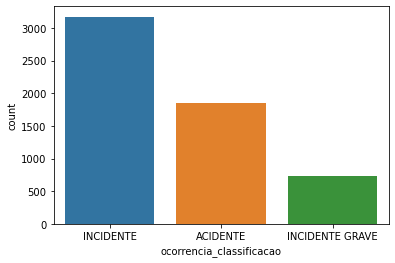

In [21]:
#Classificação das ocorrências em INCIDENTE, ACIDENTE, INCIDENTE GRAVE
sns.countplot(data=df, x='ocorrencia_classificacao')

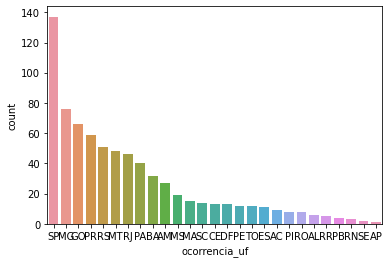

In [22]:
sns.countplot(data=incidente_grave, x='ocorrencia_uf', order=incidente_grave['ocorrencia_uf'].value_counts().index)
plt.show()

<AxesSubplot:xlabel='ocorrencia_uf', ylabel='count'>

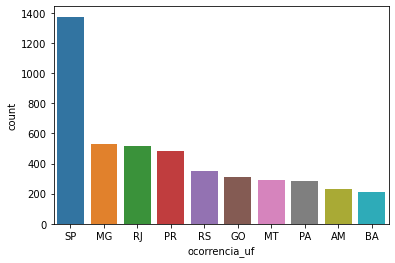

In [23]:
#Os 10 primeiros estados que mais ocorrem acidentes.
sns.countplot(data=df, x='ocorrencia_uf', order=df['ocorrencia_uf'].value_counts().index[:10])

<AxesSubplot:xlabel='ocorrencia_dia', ylabel='count'>

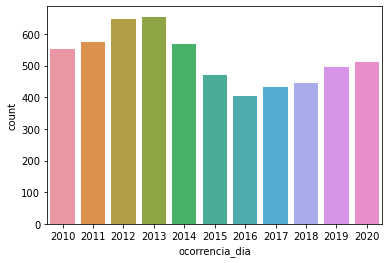

In [24]:
#verifica-se os anos com mais acidentes aéreos.
sns.countplot(data=df, x=df['ocorrencia_dia'].dt.year)

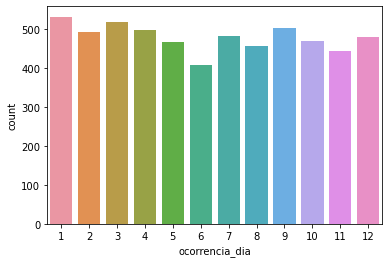

In [25]:
sns.countplot(data=df, x=df['ocorrencia_dia'].dt.month)
plt.show()

In [26]:
df.dtypes

codigo_ocorrencia                      int64
ocorrencia_classificacao              object
ocorrencia_cidade                     object
ocorrencia_uf                         object
ocorrencia_aerodromo                  object
ocorrencia_dia                datetime64[ns]
ocorrencia_hora                       object
total_recomendacoes                    int64
total_aeronaves_envolvidas             int64
ocorrencia_saida_pista                object
dtype: object

In [27]:
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'],format='%H:%M:%S')
df['ocorrencia_hora']

0      1900-01-01 12:00:00
1      1900-01-01 11:05:00
2      1900-01-01 03:00:00
3      1900-01-01 17:30:00
4      1900-01-01 19:25:00
               ...        
5747   1900-01-01 19:00:00
5748   1900-01-01 18:30:00
5749   1900-01-01 00:54:00
5750   1900-01-01 09:00:00
5751   1900-01-01 00:54:00
Name: ocorrencia_hora, Length: 5752, dtype: datetime64[ns]

In [28]:
df.dtypes

codigo_ocorrencia                      int64
ocorrencia_classificacao              object
ocorrencia_cidade                     object
ocorrencia_uf                         object
ocorrencia_aerodromo                  object
ocorrencia_dia                datetime64[ns]
ocorrencia_hora               datetime64[ns]
total_recomendacoes                    int64
total_aeronaves_envolvidas             int64
ocorrencia_saida_pista                object
dtype: object

<AxesSubplot:xlabel='ocorrencia_hora', ylabel='count'>

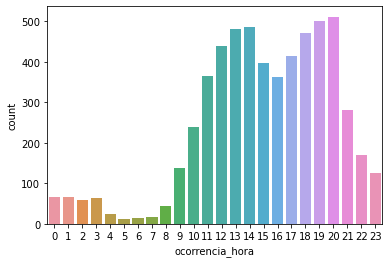

In [29]:
#verifica-se em quais horas ocorrem mais acidentes.
sns.countplot(data=df, x=df['ocorrencia_hora'].dt.hour)

In [30]:
df.ocorrencia_saida_pista.describe()
#total de aeronaves envolvidas 5752

count     5752
unique       2
top        NÃO
freq      5246
Name: ocorrencia_saida_pista, dtype: object

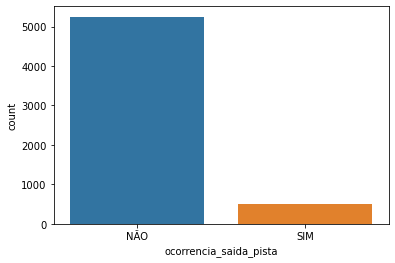

In [31]:
sns.countplot(data=df, x='ocorrencia_saida_pista')
plt.show()

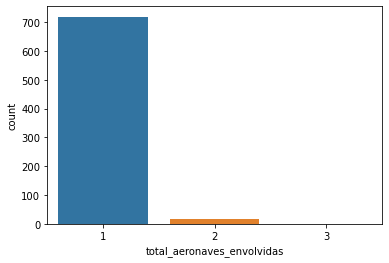

In [32]:
sns.countplot(data=incidente_grave, x='total_aeronaves_envolvidas')
plt.show()

In [33]:
df.total_aeronaves_envolvidas.describe()
#total de aeronaves envolvidas 5752

count    5752.000000
mean        1.011648
std         0.113602
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: total_aeronaves_envolvidas, dtype: float64

In [34]:
#máximo de total aeronaves envolvidas
df['total_aeronaves_envolvidas'].max()

3